<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2019 OBSERVING EXERCISE- Part 2</h2>
<h4></h4>
<i>Note: Enter in all code to the problems in the provided notebook cells. Questions to answer will be <b>bolded</b>.  However, you need to read <b>all the text carefully</b> as you will otherwise miss important elements.</i> 

This assignment is due on Sunday night at 11:59pm

In [18]:
#***Run this block but DO NOT CHANGE***

#Nothing to do here. Just some things defined for use later. 
from astroplan.plots import plot_finder_image
from astropy.coordinates import SkyCoord
from astroquery.skyview import SkyView
import astropy.units as u
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' #This is here to make the plots appear high-resolution

def get_RA_deg(RA_HMS):
    #Convert RA from HMS to decimal degrees
    H, M, S = [float(i) for i in RA_HMS.split()]
    rs = 1
    if str(H)[0] == '-': 
      rs, H = -1, abs(H)
    deg = (H*15) + (M/4) + (S/240)
    RA = '{0}'.format(deg*rs)
    return float(RA)
    
def get_DEC_deg(DEC_DMS):
    #Convert DEC from DMS to decimal degrees
    ds = 1
    D, M, S = [float(i) for i in DEC_DMS.split()]
    if str(D)[0] == '-':
      ds, D = -1, abs(D)
    deg = D + (M/60) + (S/3600)
    DEC = '{0}'.format(deg*ds)
    return float(DEC)

<p>Given your window of opportunity, first identify all open clusters that meet your time criteria from Part 1 (there will be lots of options since we are merely selecting an area of the sky as out first cut).
    
You will be using the “WEBDA” database at https://webda.physics.muni.cz/ .  This is an online database of stellar clusters that is a compiled version of clusters and lots of the data that is available for them.  

<b>1) Read the "Description" page at https://webda.physics.muni.cz/description.html </b>

You can access data in the following way.  From the main page go to the following link: Navigation→Available Data and Parameters.   This brings you a query tool that you can use to request clusters in a range of coordinates, with a minimum number of stars, and with a certain type of available data.  The Available Data and Parameters link is in the top right of the Navigation page under “Interrogation.”

To start with query the clusters using the following criteria:
<ol>
    <li>The range of RA and DEC that you determined in PART 1 for your observing block</li>
<li>A minimum number of stars that you will need to get a proper color-magnitude diagram.  Start with 100 and based on your work below, change this value to a higher or lower value depending on what you think you need to get a good CMD.</li>
<li>For the dropdown menu by “datatype” choose “UBV CCD observations”.  That will only choose clusters that have existing observations that we can use to calibrate our data.</li>
</ol>
This query will result in many clusters.  You will need to pick your targets using the following criteria.  This will involve clicking through the clusters individually to find a good one.  My suggestion is to build up a sample of clusters using the main query and then keeping a table, perhaps on a google sheet or excel sheet.  Then you can keep track of the answers to the different questions below so that you can pare down your list. </p>  

<b><i>You should upload your final table or spreadsheet to GitHub as part of this assigment.  The version of the table/spreadsheet that you upload to GitHub doesn't need to contain every cluster you looked at.  It just needs to give the ~6 objects that you have at the end of #3 below and comments for each cluster about each of the remaining questions.  It must contain a clear indication of which clusters comprise your final sample.  It should also have any important notes about each cluster that led you to choose it.</b></i>

<b>2)   How big in angular size is the cluster?</b> 
<p>
If the cluster is too large, you may not be able to observe most of it within the FOV of the camera, meaning that you won’t be able to get your observations completed without doing multiple, overlapping fields.  You can determine this a variety of ways.  If there is an image of the cluster on the main page, with a size scale, you can compare this to the FOV of the instrument that you computed in Part 1.  You can also use the <u>“From cluster chart (plotted)”</u> link under Query.
</p>

<b>3)   How sparsely (densely) populated is the cluster field?</b>
<p>If the cluster is composed of a handful of stars against a rich background field, the dominant majority of what you observe may not be in the cluster and identifying the cluster members may be an exercise in self-delusion. If the cluster is exceptionally rich/crowded, you may have a challenging time getting good photometry because the stellar images overlap. This is a common problem with globular clusters, which contain hundreds of thousands of stars, but it can also affect open clusters if they are too distant, thereby squeezing a large sample of stars into a small angular diameter.   Again, you can get this through either the image or the finder chart.</p>

************************************
<p>At this point, you want to have an observing list of ~6 potential clusters. For the next set of constraints, <i>you need to determine how much we already know about each cluster on your list from already available observations.</i></p>

<b>4)  Does the cluster have published right ascensions and declinations of the stars?</b>
<p>This will be important for when we want to use other observations to calibrate our data (see below.)  Under the main page for each cluster, you can use the “Available Data” link under the WEBDA content heading.  For the cluster to have coordinates there needs to be a  “Coordinates J2000” link and there needs to be a large list of stars with existing coordinates.  Not every cluster has RA and DEC coordinates as some people only published positions of stars on their CCD.  So you need to double check this.</p>

<b>5)   Does CCD photometry already exist that would give you some insight into the expected color-magnitude diagram (CMD) for the cluster, once your photometry is completed? </b>

This should be true as we did the query on a subset of clusters with UBV CCD photometry.  However, it is good to make sure of that, and to be sure that there are many stars with photometry. 

<b>6)   If a CMD exists for the cluster, does it look like a scatter plot or is there a respectable locus of points that probably includes the cluster members? </b>


<b>7)   How bright are the brightest apparent stars in the cluster? </b> 
<p>Brighter stars require shorter exposures but, if stars are too bright, they will quickly saturate the CCD chip in the region of the star and possibly affect fainter stars nearby. Note that this answer is sometimes coupled to the answer to (i) since nearby clusters have stars with bright apparent magnitudes (= small distance modulus). </p>

<b>8)   How faint are the faintest stars you wish to observe?</b>

<p>This requires a bit more work because you want to look at the color-magnitude diagram of the cluster to get some sense of how faint you need to observe to get a decent chunk of the CMD.  Assume that in a given band you don’t want to have to expose for longer than 15 minutes in total and that you want to get photometry in the B and V  bands.  You also want a signal-to-noise (SNR) of at least 15 for your faintest stars.  To calculate the faintest star that you can observe in 15 minutes at an SNR=15 you need to do a computation.  

For our detector and telescope a star of 20th magnitude in B and V gets 1815 and 1944 photons respectively in a 100s exposure.  The star’s light is spread over 10 pixels.  Let us conservatively (because the brightness is high then) assume that we are observing 1 day from full moon.  In that case the background per pixel is 396.3 and 295.5 in the B and V band respectively in a 100 sec. exposure.  Describe in a text cell below your computational cell whether or not you can neglect the read noise and why?  From these numbers you can calculate the the faintest magnitude that yields you a SNR=20 in 15 minutes.

<b>Your code should print out the following, with explanatory text:
    <li>a) total number of background counts in B and V in 15min for the summed pixels in an object aperture;
    <li>b) the noise from the background in 15min for the summed pixels in an object aperture;
    <li>c) the number of counts in 15min for B and V that correspond to the desired SNR;
    <li>d) the number of counts in B and V for a 20th magnitude star in 15min;
    <li>e) the magnitude in B and V corresponding to the limiting number of counts in c).
</b>

For this calculation, assume the gain is 1.  This means that if I get one photon, my CCD counts 1 electron.  Since Poisson noise is computed on the incident photons and not the number of measured electrons, you need to convert your counts to photons.  We will assume for now that this is a 1-to-1 conversion (Gain=1).  This is not correct but will be ok for this calculation.

In [19]:
#Answer 8) Here
#YOUR CODE GOES HERE

#Hint: You need to use the information about the number of counts 
#for different sources that I give above.

#In each band, think about the noise from the background over the 
#whole size of the source when observed in 15min.  From this and the 
#SNR requirement you can determine the number of object counts that you need 
#to have the required SNR (see lecture notes).  Finally, the flux from a 
#20th mag object can then be used to convert that number of counts to a 
#limiting magnitude.

import math

#first measure the total background expected in 15 minutes
print("a) The number of BKG counts in B and V in 15min is: ", (396.3*9)*10, (295.5*9)*10 )
#For the number of BKG counts, take the nubmer of counts in 100 seconds and multiply by 9. Since the count numbers are
#those counted in 100 seconds, multiplying by 9 gives the counts in 900 seconds which equals 15 minutes. This will give
#you the counts for 1 pixel. Since the image is over 10 pixels multiply this number by 10 to get the BKG counts for 15
#minutes over 10 pixels.

b_noise = math.sqrt(35667)
v_noise = math.sqrt(26595)
print("b) BKG noise in B and V: ", b_noise, v_noise )
#The noise goes as sqrt(number of photons). We calculated the number of photons in 15 minutes in part a, so if we then
#take the square root of those numbers we will get the noise of the background in 15 minutes.

#now determine the number of object counts needed in 15 minutes to get the desired SNR. 
b_limit = b_noise*15
v_limit = v_noise*15
print("c) limiting counts for SNR limit in B and V: ", b_limit, v_limit  )

print("d) the number of counts in B and V for a 20th mag object in 15min: ", 1815*9, 1944*9 )
#Like part a, multiply the number of counts in 100 seconds by 9 to get the number of counts in 15 minutes.

mb_limit = 2.5*math.log10(35667/b_limit)+20
mv_limit = 2.5*math.log10(26595/v_limit)+20
print("e) magnitude limits in B and V corresponding to our SNR limit: ", mb_limit, mv_limit )


a) The number of BKG counts in B and V in 15min is:  35667.0 26595.0
b) BKG noise in B and V:  188.8570888264457 163.0797350991226
c) limiting counts for SNR limit in B and V:  2832.8563323966855 2446.196026486839
d) the number of counts in B and V for a 20th mag object in 15min:  16335 17496
e) magnitude limits in B and V corresponding to our SNR limit:  22.75010507957769 22.590771845681545


Now decide whether your clusters have enough stars above this limit to be able to construct an adequate CMD.

<i>Note that you you don’t need to go as faint as possible.  You need to make a decision based on the characteristics of the cluster CMD.  For example, at the calculated magnitude limit are you just picking up the cluster giant branch or are you getting some fraction of the turnoff and main sequence?   You want a cluster such that your magnitude limit allows you to go deep enough to learn something about the cluster.</i></p>

<b> 9)   How good are the available cluster data?</b>
<p>If the cluster has been studied many times and there is lots of published data, give a reason why you might be observing it again? If there is little to no published data, why has everybody ignored it? Keep in mind that you’d like to have some means of calibrating the photometry. If there are no existing observations in the cluster and the skies are usable but not photometric, e.g. there is light cirrus that varies hourly, you won’t be able to calibrate your CCD frames using external (outside the cluster) standards, so some internal means of checking your photometry would be crucial. 
</p>

--------------------------
<i> By this point you should have enough information to pick 2-3 clusters that you might want to observe given all of the conditions above.  Below you will make some plots for each of these clusters.  </i>



<p> We will now provide you with a way to make CMDs and a histogram of the V-band magnitudes. To do this, you will need to click the "Available Data" link on the wbeda interface, and then click the "UBV CCD" link. This should bring you to a table of values with 5 columns: No, Ref, V, B-V, and U-B. <b>Copy and paste this entire table (inlcuding the columns names) into a text editor of your choice, and save it as a text file. You can then use the make_plots() function (defined below), by passing in as input the string of your file name (ex: "cluster.txt").</b> Please note that you need to use the cell block below the block of code directly below this text cell where the function is defined (if you try to call make_plots() before the cell it is written in you will get an error). You also need to make sure that the file with the data (there will be different ones for each cluster) is in the same directory as where the notebook is.  This isn't a generic requirement of such codes, but what we are doing here.</p>

In [26]:
#***RUN THIS BLOCK. If you wish to change the font sizes in the plots, you can do so here.  ***

#Now we just define some settings for our plots. 
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray', #gray
    'axes.grid': False,
    'savefig.dpi': 300,  
    'axes.labelsize': 14, # fontsize for x and y labels
    'axes.titlesize': 20, 
    'font.size': 14, 
    'legend.fontsize': 10, 
    'xtick.labelsize': 12,
    'ytick.labelsize': 12, 
    'text.usetex': False,
    'figure.figsize': [6, 6], #[width, height]
    'figure.autolayout': False,
    'font.family': 'monospace',
}
matplotlib.rcParams.update(params) #activate the settings

def make_plots(file_name):
    print("********************************************")
    print("Plots for file: "+file_name)
    print("********************************************")
    #We load in the first 4 columns of the file
    data = np.loadtxt(file_name,skiprows = 1,usecols = (0,1,2,3), dtype={'names': ('No', 'Ref', 'V', 'B-V'), 'formats': ('S8', 'S16', 'S16','S16')})
    
    #We need to handle duplicates in the file, so we find indeces of unique sources
    indeces_use = []
    len_data = len(data)
    for i in range(1,len_data-1): #Skip first row since it contains columns names.
        if data[i][0] != data[i+1][0]: #Check if the next source is a repeat
            indeces_use.append(i) #If it is not a repeat, it is unique and we record its index.
            
    num_sources = len(indeces_use) #Number of actual unique sources
    
    #We will now average over the magnitudes for repeated sources
    V_avg = np.zeros(num_sources)
    BV_avg = np.zeros(num_sources)
    for i in range(num_sources):
        current_index = indeces_use[i] #Keep track of the first index that this source appears at
        num_i = 1 #Keep track of the number of sources with this source name
        V_tot = float(data[current_index][2])
        BV_tot = float(data[current_index][3])
        #While the next source has the same source name
        while current_index < (num_sources - 2) and data[current_index][0] == data[current_index+1][0]:
            current_index += 1 #We go to the next repeat of this source.
            num_i += 1 
            V_tot += float(data[current_index][2]) #Add the next value forn this repeated source to the total mag
            BV_tot += float(data[current_index][3])
        V_avg[i] = V_tot/num_i
        BV_avg[i] = BV_tot/num_i

    #Make the figure for the CMD
    fig1, ax1 = plt.subplots()
    ax1.set_xlabel(r'$B-V\ [mag]$')
    ax1.set_ylabel(r'$V\ [mag]$')
    ax1.grid(which= 'major', linestyle='-', linewidth='0.5', color = 'black', alpha = 0.3)
    ax1.grid(which='minor', linestyle=':', linewidth='0.3', color = 'black', alpha = 0.2)
    ax1.scatter(BV_avg, V_avg, marker = '.', c='k')

    #Create good min and max values for CMD axes, and set axis limits. 
    x_min_plot = np.min(BV_avg)-abs(.1*np.min(BV_avg))
    x_max_plot = 1.1*np.max(BV_avg)
    y_min_plot = np.min(V_avg)-abs(.1*np.min(V_avg))
    y_max_plot = 1.1*np.max(V_avg)
    ax1.set_xlim([float(x_min_plot), float(x_max_plot)])
    ax1.set_ylim([float(y_max_plot), float(y_min_plot)])
    ax1.set_title(r'Color Magnitude Diagram')

    #Make figure for histogram. 
    fig2, ax2 = plt.subplots()
    ax2.hist(V_avg, bins = 'auto',histtype ='step', color = 'k', lw = 1.5)
    ymin_hist, ymax_hist = ax2.get_ylim()
    xmin_hist, xmax_hist = ax2.get_xlim()
    #Write on the number of total sources for reference
    ax2.annotate( 'N = '+str(num_sources), xy = ( xmin_hist + 0.05*(xmax_hist-xmin_hist), ymax_hist - 0.1*ymax_hist))
    ax2.set_title(r'V mag Histogram')
    ax2.set_xlabel(r'$V\ [mag]$')
    ax2.set_ylabel(r'Counts')

********************************************
Plots for file: B51.txt
********************************************
********************************************
Plots for file: NGC7044.txt
********************************************


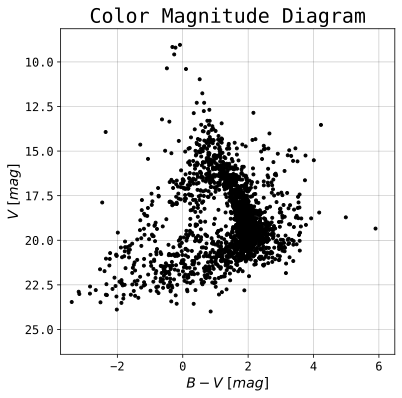

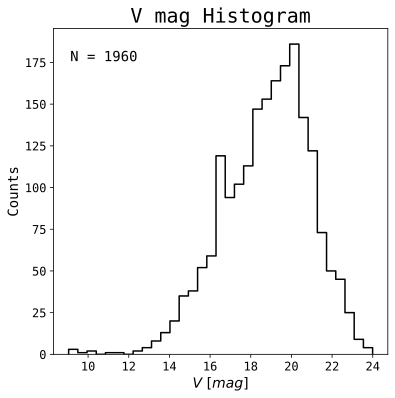

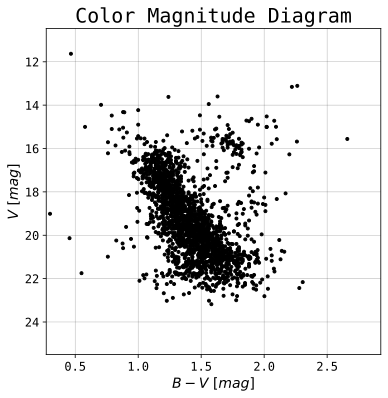

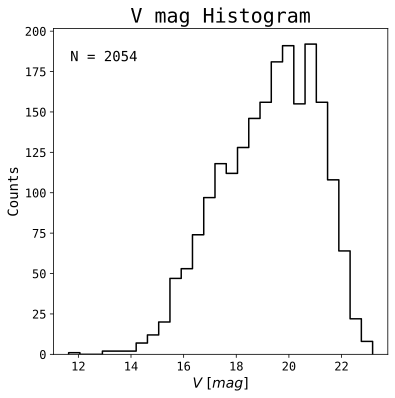

In [35]:
#*****************
#In this block of code you will make a CMD plot and a V-band magnitude histogram.
#You will need to repeat this for each cluster.

#Example call of make_plots for the file "cluster.txt"
#   
#    make_plots("cluster.txt")
#
#Replace "cluster.txt" with the name of your files. You will need to do this for all clusters you use, using a 
#separate text file and call of make_plots for each cluster. 
#YOUR CODE HERE


make_plots("B51.txt")
make_plots("NGC7044.txt")

<b>For each cluster, comment on the characteristics of the two graphs</b>

The counts seem to peek around 20 mag for both histograms. This would mean that the majority of the stars in the clusters are around 20 mag.

In [30]:
#***RUN THIS BLOCK***
#This is a routine to pull images from the web at the location of your source and 
#to overlay the MLO 40-inch Camera's field of view

def make_finder(RA_HMS, DEC_DMS, fov, img_width=20/60, img_height=20/60):
    #Use the RA and DEC to make a SkyCoord object, which we use to query and image
    RA_DEG = get_RA_deg(RA_HMS) #convert to Degrees
    DEC_DEG = get_DEC_deg(DEC_DMS)
    source_coord = SkyCoord(ra= RA_DEG*u.deg,dec = DEC_DEG*u.deg)

    #Query an image using astroquery with the given coordinates and image width/height
    xout = SkyView.get_images(source_coord,survey=['DSS'],height=img_height*u.deg,width=img_width*u.deg)
    
    #Make the figure object and handle the fits image appropriately.
    fig, ax = plt.subplots(figsize=(8,8))
    b=xout[0][0]
    ax.imshow(xout[0][0].data,aspect='equal',cmap='gray_r',extent=[b.header['CRVAL1']-(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                               b.header['CRVAL1']+(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                               b.header['CRVAL2']+(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2'],
                                                               b.header['CRVAL2']-(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2']])
    #Overlay a rectangle indicating the fov
    rect = plt.Rectangle((RA_DEG-0.5*(fov),DEC_DEG-0.5*(fov)) ,fov,fov,linewidth=1,fill=False, color='k')
    plt.gca().add_artist(rect)
    ax.set_xlabel(r'RA [DEG]')
    ax.set_ylabel(r'DEC [DEG]')

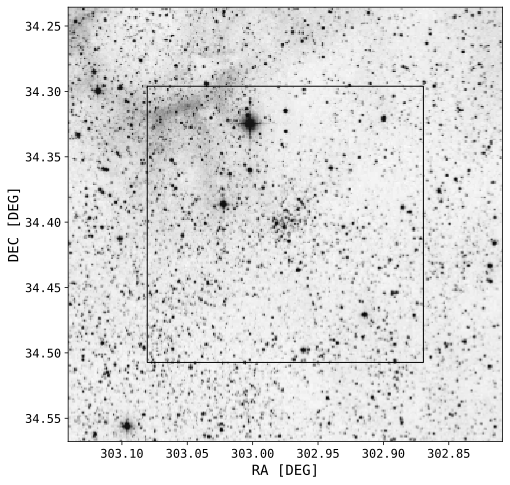

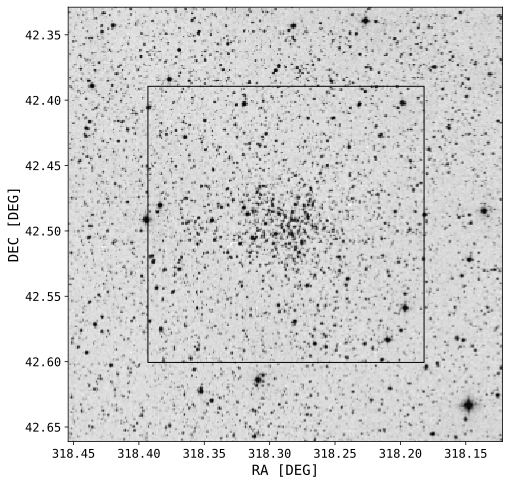

In [36]:
#************
#This block of code allows you to make a finder chart for your cluster using the make_finder() function 
#defined above.
#You will need to do this for each of your three clusters.  
#We provide example code below.

####First, define the RA and DEC of the cluster as follows, in HMS for RA and DMS for DEC
#source_RA = '07 38 46'
#source_DEC = '-33 50 36'
#
####Now, define the fov in arcmin. This should be the fov of your instrument from part 1
#fov = 12.7
#fov_degrees = fov/60
#
#make_finder(source_RA, source_DEC, fov_degrees)
#***********YOUR CODE HERE

source_RA_51 = '20 11 54'
source_DEC_51 = '34 24 06'
fov =   12.672921599999999
fov_degrees = fov/60
make_finder(source_RA_51, source_DEC_51, fov_degrees)

source_RA_7044 = '21 13 09'
source_DEC_7044 = '42 29 42'
fov =   12.672921599999999
fov_degrees = fov/60
make_finder(source_RA_7044, source_DEC_7044, fov_degrees)

<b><p>
Your completed version of the Jupyter Notebook template will need to have for each cluster:
<ol>  
    <li>A plot of the RA and DEC of the cluster with an outline of the field of view of the detector centered on the cluster.</li>
    <li>A histogram of the V-band magnitudes of the cluster members</li>
    <li>A color-magnitude diagram of the B-V vs V-band for all the stars in the cluster field.  </li>
</ol>

You will also need to have a block of summary text that describes your choice of clusters.
</p></b>

I have chosen two clusters that match all of the criteria; Berkeley 51, and NGC 7044. They both fit within the fov of the telescope as they both have an angular size of 10 arcmin. Their population densities are neither too high or too low so the images will neither have too much or too little light. The RA and Declinations of the clusters are within the observing time for the second half of Wednesday's observation. The limiting magnitude was found to be around 22 mag and both clusters have a good amount of stars fainter than that magnitude so we should be able to get a good exposure from them. Both clusters also have a few articles about them, so they have been observerd before. However, they don't have an extensive database about them so they could be observed again to get more/better data.